In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Load the data from pickle file:

In [3]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

In [4]:
#dimensions
print(X_train.shape)
r_Xt, c_Xt = X_train.shape
print("X_train has:", r_Xt, "rows and", c_Xt, "columns")

print(X_ivs.shape)
r_Xi, c_Xi = X_ivs.shape
print("X_ivs has:", r_Xi, "rows and", c_Xi, "columns")

print(y_train.shape)
r_yt, = y_train.shape
print("y_train has:", r_yt, "rows")

print("Column names:", col_names)
len(col_names)

(7337, 2132)
X_train has: 7337 rows and 2132 columns
(816, 2132)
X_ivs has: 816 rows and 2132 columns
(7337,)
y_train has: 7337 rows
Column names: ['D00', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'FP0000', 'FP0001', 'FP0002', 'FP0003', 'FP0004', 'FP0005', 'FP0006', 'FP0007', 'FP0008', 'FP0009', 'FP0010', 'FP0011', 'FP0012', 'FP0013', 'FP0014', 'FP0015', 'FP0016', 'FP0017', 'FP0018', 'FP0019', 'FP0020', 'FP0021', 'FP0022', 'FP0023', 'FP0024', 'FP0025', 'FP0026', 'FP0027', 'FP0028', 'FP0029', 'FP0030', 'FP0031', 'FP0032', 'FP0033', 'FP0034', 'FP0035', 'FP0036', 'FP0037', 'FP0038', 'FP0039', 'FP0040', 'FP0041', 'FP0042', 'FP0043', 'FP0044', 'FP0045', 'FP0046', 'FP0047', 'FP0048', 'FP0049', 'FP0050', 'FP0051', 'FP0052', 'FP0053', 'FP0054', '

2132

In [5]:
#missing values
missing_values_X_train = np.sum(np.isnan(X_train))
print("Missing values in X_train:", missing_values_X_train)

missing_values_X_ivs = np.sum(np.isnan(X_ivs))
print("Missing values in X_ivs:", missing_values_X_ivs)

missing_values_y_train = np.sum(np.isnan(y_train))
print("Missing values in y_train:", missing_values_y_train)

Missing values in X_train: 0
Missing values in X_ivs: 0
Missing values in y_train: 0


In [6]:
data = pd.DataFrame(np.array(X_train))
data #to see the dataframe

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#give the column names to the xtrain
data.columns = col_names
data

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---


Feature selection: 

In [8]:
N,M = X_train.shape
N,M

(7337, 2132)

In [10]:
#to define the best features to use in the PCA
rfr=RandomForestRegressor(random_state=0)

sel = SelectFromModel(estimator=rfr, threshold=0.005)
sel.fit(X_train, y_train)

print("threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

threshold:  0.005
The features selected are columns:  [  11   22   25   26   27   29   30   31   32   34   37   38   40   41
   42  336  364  494  839  853  886  909  939  959  982 1054 1285 1598
 1709 1922]


In [11]:

#o data é o nosso xtrain em pandas dataframe "data = pd.DataFrame(np.array(X_train))"
#fazemos iloc so para ver o nome das colunas que correspondem aos melhores features
data.iloc[:, [11,22, 25, 26, 27, 29, 30, 31, 32, 34, 37, 38, 40, 41, 42, 336, 364, 494, 839, 853, 886, 909, 939, 959, 982, 1054, 1285, 1598, 1709, 1922]].columns

Index(['D11', 'D22', 'D25', 'D26', 'D27', 'D29', 'D30', 'D31', 'D32', 'D34',
       'D37', 'D38', 'D40', 'D41', 'D42', 'FP0293', 'FP0321', 'FP0451',
       'FP0796', 'FP0810', 'FP0843', 'FP0866', 'FP0896', 'FP0916', 'FP0939',
       'FP1011', 'FP1242', 'FP1555', 'FP1666', 'FP1879'],
      dtype='object')

esses indexes correspondem as features com maior importancia

In [12]:
#criamos a nova x_train so com as features
x_important_features = data[['D11', 'D22', 'D25', 'D26', 'D27', 'D29', 'D30', 'D31', 'D32', 'D34', 'D37', 'D38', 'D40', 'D41', 'D42', 'FP0293', 'FP0321', 'FP0451', 'FP0796', 'FP0810', 'FP0843', 'FP0866', 'FP0896', 'FP0916', 'FP0939', 'FP1011', 'FP1242', 'FP1555', 'FP1666', 'FP1879']]

In [13]:
#append the y train to the X matrix containing the important features
v = np.hstack((y_train.reshape((N,1)), x_important_features))

pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.654947,0.366667,0.0,92.94,3.05150,157.2168,13.918232,8.076785,8.076785,5.801320,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.649995,0.333333,1.0,62.40,5.06700,121.4485,11.924618,7.288243,7.288243,4.537164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.154947,0.363636,1.0,41.90,4.34520,102.5950,9.339378,5.227266,5.227266,3.910611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.616176,0.454545,12.0,420.92,2.83877,404.3975,37.662847,21.277605,21.277605,15.539352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.359725,0.428571,1.0,36.44,3.83150,105.0585,9.892722,5.811508,5.811508,4.211670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,0.409091,0.0,60.93,3.45230,113.9953,11.924464,7.748980,7.748980,5.758975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.002193,0.375000,0.0,8.17,3.32520,74.4220,6.804014,3.855253,3.855253,2.808474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7334,0.293481,0.437500,1.0,33.95,7.46400,158.8360,17.433494,7.792478,7.792478,5.425698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,0.596804,0.434783,2.0,49.57,4.01550,116.5169,11.331340,7.533947,7.533947,6.252005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


now we can compute and view the correlation matrix (note that we are interested only inn the first column)

In [14]:
pd.DataFrame(np.corrcoef(v.T))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.100471,0.018931,0.103851,0.086126,0.167554,0.179005,0.188800,0.188800,0.190945,...,0.204150,-0.012896,0.094850,-0.032046,0.163203,0.289203,0.195418,-0.142868,0.139738,0.154870
1,0.100471,1.000000,0.163290,0.081171,-0.128844,0.084660,0.163933,0.204683,0.204683,0.224242,...,0.028306,0.060220,-0.002621,-0.065110,0.087739,-0.064640,-0.001623,-0.043935,-0.025289,-0.010581
2,0.018931,0.163290,1.000000,0.679744,-0.191923,0.624457,0.633933,0.650883,0.650883,0.668003,...,0.136491,0.023873,0.047524,-0.027688,-0.003207,-0.137084,-0.008222,-0.020317,-0.023530,0.007382
3,0.103851,0.081171,0.679744,1.000000,-0.295736,0.862129,0.853932,0.775714,0.775714,0.724781,...,0.170499,0.021568,-0.004666,-0.027769,0.006146,0.042770,0.095594,-0.034448,0.020274,0.005610
4,0.086126,-0.128844,-0.191923,-0.295736,1.000000,0.129607,0.133074,0.184093,0.184093,0.194674,...,-0.049994,0.114429,0.047125,-0.035089,0.064614,-0.053411,-0.036306,-0.068689,0.103063,0.022625
5,0.167554,0.084660,0.624457,0.862129,0.129607,1.000000,0.988800,0.931967,0.931967,0.886982,...,0.157080,0.046426,-0.018977,-0.009833,0.023279,0.111537,0.087866,-0.022414,0.043211,0.017663
6,0.179005,0.163933,0.633933,0.853932,0.133074,0.988800,1.000000,0.966175,0.966175,0.929516,...,0.173298,0.064439,-0.017755,-0.022332,0.047081,0.070987,0.080584,-0.034677,0.064869,0.042168
7,0.188800,0.204683,0.650883,0.775714,0.184093,0.931967,0.966175,1.000000,1.000000,0.988185,...,0.202009,0.101639,0.000581,-0.022055,0.095529,0.018392,0.058095,-0.037849,0.080722,0.084880
8,0.188800,0.204683,0.650883,0.775714,0.184093,0.931967,0.966175,1.000000,1.000000,0.988185,...,0.202009,0.101639,0.000581,-0.022055,0.095529,0.018392,0.058095,-0.037849,0.080722,0.084880
9,0.190945,0.224242,0.668003,0.724781,0.194674,0.886982,0.929516,0.988185,0.988185,1.000000,...,0.211981,0.098274,0.002832,-0.024288,0.117812,-0.016247,0.044759,-0.052097,0.083259,0.107660


--- 
scaling 

In [15]:
# scale the data in 'x_important_features'
scaler = MinMaxScaler()  #with MinMaxScaler
x_scaled_features = scaler.fit_transform(x_important_features)


# scaler_after_pca = MinMaxScaler(feature_range=(0, 1))
# X_train_pca_scaled = scaler_after_pca.fit_transform(X_train_pca)

---
PCA

In [16]:
pca = PCA(n_components=3)
pca.fit(x_scaled_features)

tve = 0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve += ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve))
print()
print("Actual Eigenvalues:", pca.singular_values_)
for i, comp in enumerate(pca.components_):
    print("PC", i, "-->", comp)

PC0 - Variance explained:  0.2048 - Total Variance:  0.2048
PC1 - Variance explained:  0.1716 - Total Variance:  0.3764
PC2 - Variance explained:  0.1068 - Total Variance:  0.4832

Actual Eigenvalues: [37.84494641 34.63778729 27.32108177]
PC 0 --> [ 0.02943817  0.01951821 -0.00179211  0.01341572 -0.00722488 -0.00138567
  0.00833782  0.00833782  0.01401912 -0.00421128  0.00641885  0.01154911
 -0.00882835 -0.00699054 -0.00804584 -0.0126968   0.26758706  0.00119748
  0.25618396  0.10675744  0.01498581  0.20135674  0.00520148 -0.11029655
  0.05889541 -0.88738689 -0.05368936 -0.01713137  0.02616118  0.03545046]
PC 1 --> [ 0.00815692 -0.00108914  0.00353478  0.01350074  0.01211277  0.0125027
  0.01699818  0.01699818  0.01541533  0.01053315  0.01035157 -0.01061536
  0.00640857  0.00358425  0.00467727 -0.00770776  0.48110513 -0.07474842
  0.45813221 -0.06798972 -0.05348538  0.59741639 -0.03287547  0.02965349
 -0.11878717  0.37998508  0.13587737  0.00560667 -0.04558119 -0.07614353]
PC 2 --> [ 0

In [17]:
#pra separar em test train o x e o y

kf = KFold(n_splits=5, shuffle=True, random_state=23)
kf.get_n_splits(x_important_features)
TRUTH_nfold = []
PREDS_nfold = []

for train_index, test_index in kf.split(x_important_features):
    X_train, X_test = x_important_features.iloc[train_index], x_important_features.iloc[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]



---
MODELS:

---
Linear model - linear regression

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train_fold)

preds = model.predict(X_test)
explained_variance_score(y_test_fold, preds)

print("The RVE is: ", explained_variance_score(y_test_fold, preds))
print("The rmse is: ", mean_squared_error(y_test_fold, preds, squared=False))
corr, pval=pearsonr(y_test_fold, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test_fold, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test_fold, preds))

The RVE is:  0.2581631890831244
The rmse is:  0.23620612257685103
The Correlation Score is is: 0.5082 (p-value=3.630287e-97)

The Maximum Error is is:  0.855458372178165
The Mean Absolute Error is:  0.18999325718113264


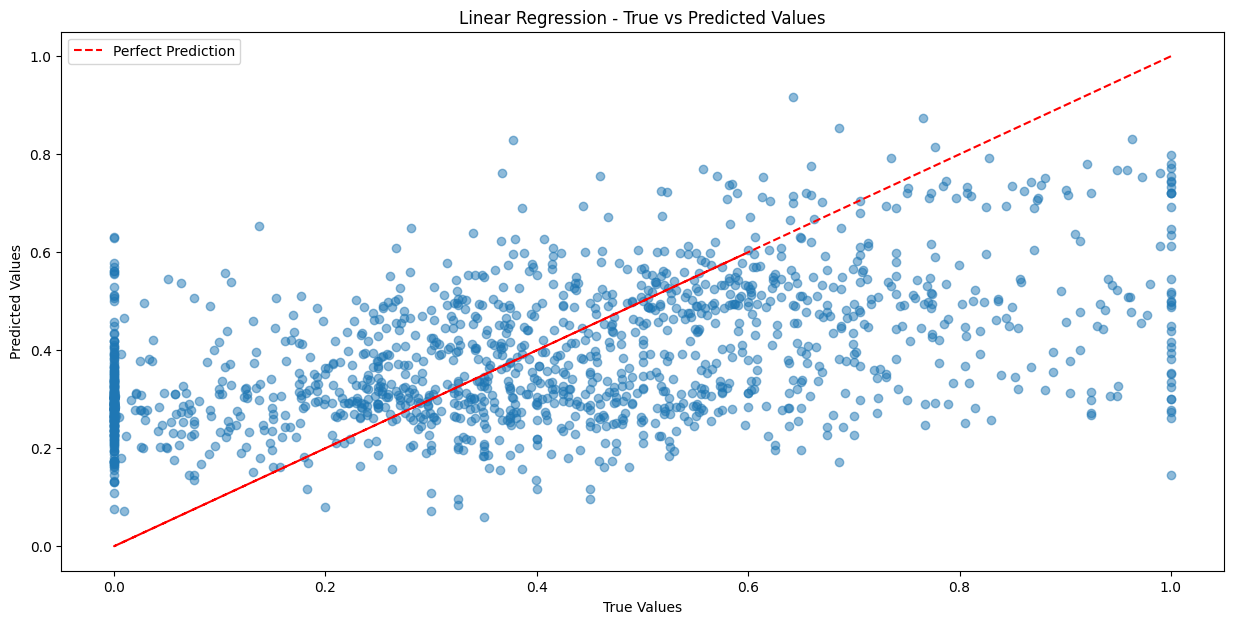

In [19]:
# Create a scatter plot of true vs predicted values
plt.figure(figsize=(15, 7))
plt.scatter(y_test_fold, preds, alpha=0.5)
plt.title('Linear Regression - True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Add a line representing the perfect prediction (y = x)
plt.plot(y_test_fold, y_test_fold, color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.show()

---
Decision tree

In [20]:
mdl = DecisionTreeRegressor(max_depth=3)
mdl.fit(X_train, y_train_fold)
preds = mdl.predict(X_test)

explained_variance_score(y_test_fold, preds)

print("The RVE is: ", explained_variance_score(y_test_fold, preds))
print("The rmse is: ", mean_squared_error(y_test_fold, preds, squared=False))
corr, pval=pearsonr(y_test_fold, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test_fold, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test_fold, preds))


The RVE is:  0.17064186938110848
The rmse is:  0.24968963581522316
The Correlation Score is is: 0.4163 (p-value=1.456206e-62)

The Maximum Error is is:  0.8750060239999999
The Mean Absolute Error is:  0.19823896792927248


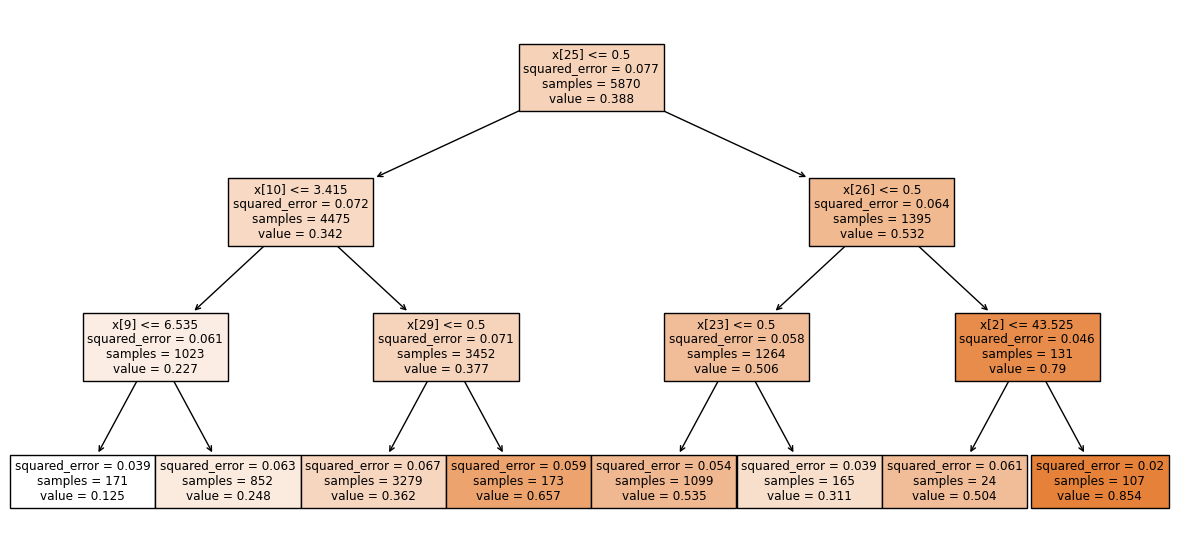

In [21]:
plt.figure(figsize=(15,7))
r=plot_tree(mdl, filled=True)
plt.show()

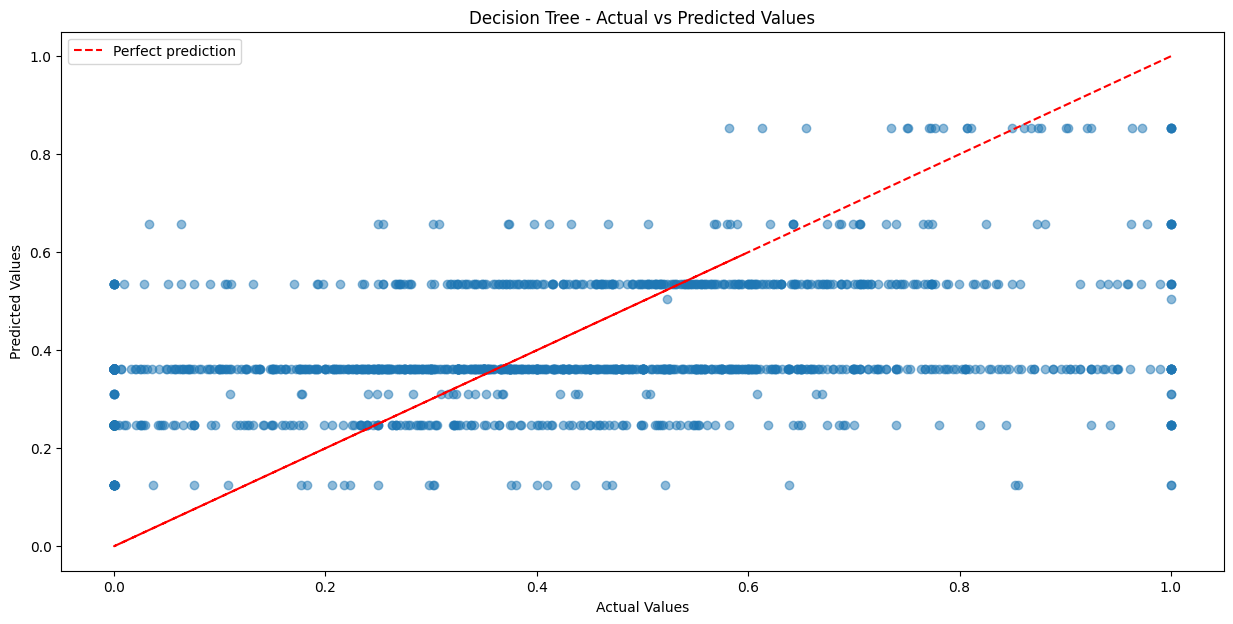

In [22]:
#Plot it as a scatterplot just to compare
plt.figure(figsize=(15, 7))
plt.scatter(y_test_fold, preds, alpha=0.5)
plt.title('Decision Tree - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.plot(y_test_fold, y_test_fold, color='red', linestyle='--', label='Perfect prediction')
plt.legend()
plt.show()
plt.show()

---
Random Forest

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_fold)
preds = rf_model.predict(X_test)

explained_variance_score(y_test_fold, preds)

print("The RVE is: ", explained_variance_score(y_test_fold, preds))
print("The rmse is: ", mean_squared_error(y_test_fold, preds, squared=False))
corr, pval=pearsonr(y_test_fold, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test_fold, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test_fold, preds))

The RVE is:  0.49812233971204256
The rmse is:  0.1943002593725851
The Correlation Score is is: 0.7059 (p-value=1.194193e-221)

The Maximum Error is is:  0.80051744356
The Mean Absolute Error is:  0.14591130592216914


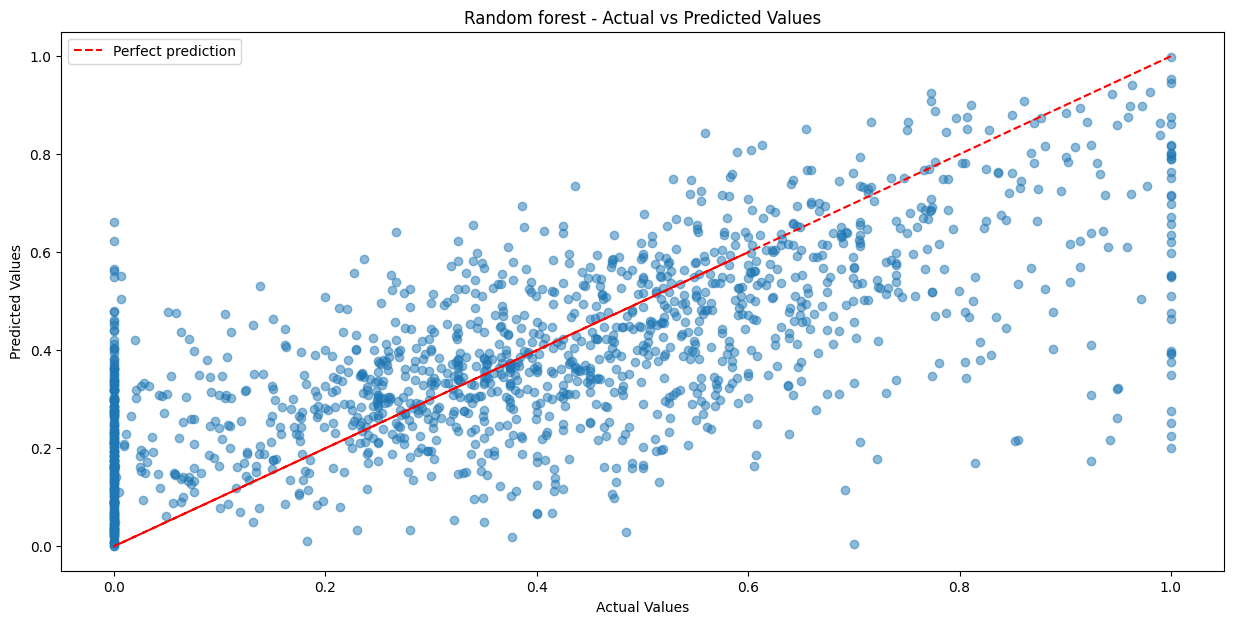

In [24]:
plt.figure(figsize=(15, 7))
plt.scatter(y_test_fold, preds, alpha=0.5)
plt.title('Random forest - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.plot(y_test_fold, y_test_fold, color='red', linestyle='--', label='Perfect prediction')

plt.legend()
plt.show()
plt.show()

---
Compare the 3 models in terms of RVE values

In [25]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train_fold)

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train_fold)

lmr = LinearRegression()
lmr.fit(X_train, y_train_fold)

rf_preds = rfr.predict(X_test)
dt_preds = dtr.predict(X_test)
lr_preds = lmr.predict(X_test)

print("RVE RFs: %7.4f" % explained_variance_score(y_test_fold, rf_preds))
print("RVE DTs: %7.4f" % explained_variance_score(y_test_fold, dt_preds))
print("RVE LRs: %7.4f" % explained_variance_score(y_test_fold, lr_preds))


RVE RFs:  0.4941
RVE DTs:  0.2509
RVE LRs:  0.2582


agora, apenas para o MELHOR MODELO, fazemos o X_ivs

ypreds = F(xivs) que é "#ypred = F(Xivs)  


y_pred = model.predict(X_ivs)"

In [27]:
# scaler_after_pca = MinMaxScaler(feature_range=(0, 1))


# X_train_pca_scaled = scaler_after_pca.fit_transform(X_train_pca)

In [26]:
data_ivs = pd.DataFrame(np.array(X_ivs))
data_ivs.columns = col_names
X_ivs_features = data_ivs[['D11', 'D22', 'D25', 'D26', 'D27', 'D29', 'D30', 'D31', 'D32', 'D34', 'D37', 'D38', 'D40', 'D41', 'D42', 'FP0293', 'FP0321', 'FP0451', 'FP0796', 'FP0810', 'FP0843', 'FP0866', 'FP0896', 'FP0916', 'FP0939', 'FP1011', 'FP1242', 'FP1555', 'FP1666', 'FP1879']]

In [28]:
#preds for values in X_ivs
rf_preds = rf_model.predict(X_ivs_features)


# Certificar que as previsões estão no intervalo [0, 1]
preds = np.clip(rf_preds, 0, 1)

'''scaler = MinMaxScaler(feature_range=(0, 1))
preds = scaler.fit_transform(rf_preds)'''

'scaler = MinMaxScaler(feature_range=(0, 1))\npreds = scaler.fit_transform(rf_preds)'

Predictions - text file with the predicted values for the X_ivs data dataset, with one prediction per line in exactly the same order as X_ivs. Do not use any headers. The name of the submitted file must be xx.txt, where xxcorresponds to the group number. Thus, group 1, will submit a file named 01.txt, and group 23, will submit a file named 23.txt

---
Save the predict file as 16.txt

In [29]:
# Guardar as previsões em um único arquivo de texto
np.savetxt("16.txt", preds)

---
---